In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('smart_home_energy_consumption.csv')

In [ ]:
df.head(10)

,Date,Home_ID,City,Energy_Consumption_kWh,Occupancy,Temperature_C,Humidity_%,HVAC_Usage_kWh,Kitchen_Usage_kWh,Electronics_Usage_kWh
0,2024-03-14 06:00:00,Home_8,Lucknow,3.14,1,25.71,46.10,1.12,0.97,0.38
1,2024-04-06 06:00:00,Home_9,Hyderabad,4.70,1,27.73,45.42,0.54,1.45,0.30
2,2024-01-30 13:00:00,Home_4,Lucknow,2.27,0,16.20,57.50,-0.22,0.21,0.26
3,2024-03-05 12:00:00,Home_5,Ahmedabad,0.80,0,23.30,58.46,2.15,0.82,0.55
4,2024-01-19 00:00:00,Home_10,Kolkata,2.43,0,21.18,84.52,1.65,0.27,0.94
5,2024-03-20 22:00:00,Home_8,Mumbai,1.53,1,24.12,62.88,2.08,1.03,0.60
6,2024-03-25 11:00:00,Home_2,Chennai,3.74,1,27.16,55.26,0.11,1.14,0.06
7,2024-03-03 02:00:00,Home_2,Lucknow,1.63,1,24.44,44.79,0.81,0.22,0.12
8,2024-02-04 22:00:00,Home_4,Lucknow,2.17,0,20.04,64.69,1.57,1.26,0.56
9,2024-03-26 18:00:00,Home_7,Bangalore,4.41,1,31.20,53.09,1.85,0.71,0.85


In [ ]:
df.shape

(2500, 10)

Dataset contains 2500 Rows and 10 Columns

## **1**. **Data**  **Importing and Initial Exploration**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    2500 non-null   object 
 1   Home_ID                 2500 non-null   object 
 2   City                    2500 non-null   object 
 3   Energy_Consumption_kWh  2500 non-null   float64
 4   Occupancy               2500 non-null   int64  
 5   Temperature_C           2500 non-null   float64
 6   Humidity_%              2500 non-null   float64
 7   HVAC_Usage_kWh          2500 non-null   float64
 8   Kitchen_Usage_kWh       2500 non-null   float64
 9   Electronics_Usage_kWh   2500 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 195.4+ KB


Energy_Consumption_kwh, Temperature, Humidity & HVAC_Usage contains Missing Values

In [ ]:
df.isnull().sum()

Date                      0
Home_ID                   0
City                      0
Energy_Consumption_kWh    0
Occupancy                 0
Temperature_C             0
Humidity_%                0
HVAC_Usage_kWh            0
Kitchen_Usage_kWh         0
Electronics_Usage_kWh     0
dtype: int64

In [ ]:
df.describe()

,Energy_Consumption_kWh,Occupancy,Temperature_C,Humidity_%,HVAC_Usage_kWh,Kitchen_Usage_kWh,Electronics_Usage_kWh
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,0.500956,0.696000,0.500714,0.492435,0.569406,0.489643,0.502522
std,0.183318,0.460075,0.165378,0.139823,0.140903,0.136895,0.139550
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375587,0.000000,0.390064,0.397757,0.477654,0.395270,0.408451
50%,0.502347,1.000000,0.499679,0.490140,0.571229,0.493243,0.502347
75%,0.625978,1.000000,0.612260,0.585215,0.667598,0.584459,0.596244
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<ipython-input-4-75edcfd036f8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Energy_Consumption_kWh'])
<ipython-input-4-75edcfd036f8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temperature_C'])


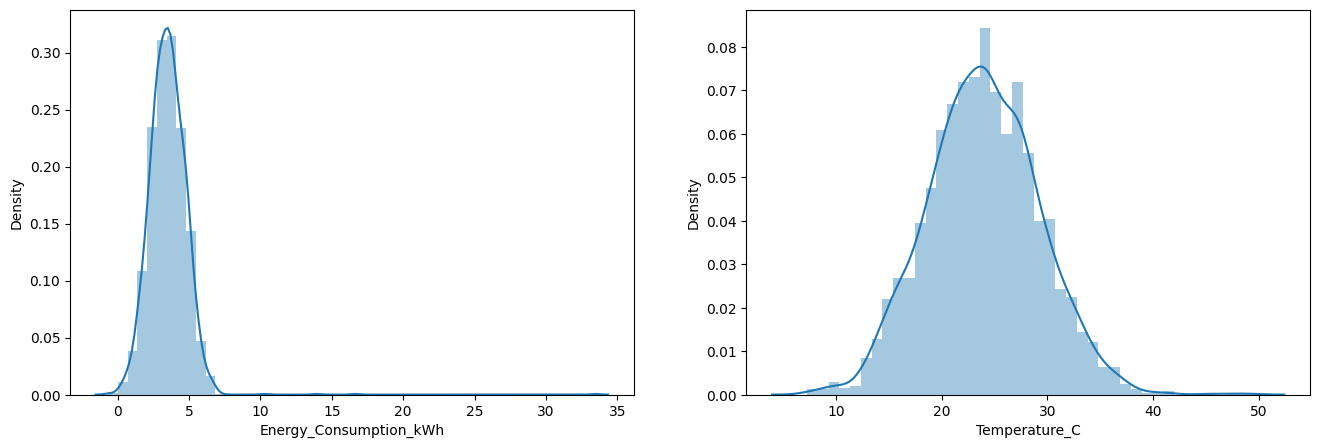

In [4]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Energy_Consumption_kWh'])

plt.subplot(1,2,2)
sns.distplot(df['Temperature_C'])

plt.show()

Since the data is Normally Distributed for Temperature, we can apply Z-Score Technique for Outlier Detection and IQR for Energy_Consumption as it is Right Skewed

# **2**. **Handling Missing Data**

In [ ]:
df.isnull().sum()

Date                      0
Home_ID                   0
City                      0
Energy_Consumption_kWh    0
Occupancy                 0
Temperature_C             0
Humidity_%                0
HVAC_Usage_kWh            0
Kitchen_Usage_kWh         0
Electronics_Usage_kWh     0
dtype: int64

Handled the Missing Data Using KNN Imputer

*   Applied on 4 Columns with Missing Values



In [5]:
from sklearn.impute import KNNImputer

# Select columns to impute
columns_to_impute = ['Energy_Consumption_kWh', 'Temperature_C', 'Humidity_%', 'HVAC_Usage_kWh']

# Select only numerical columns that need to be imputed
df_numerical = df[columns_to_impute]

# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Apply the KNN imputer to the selected numerical columns
df_imputed = pd.DataFrame(imputer.fit_transform(df_numerical), columns=columns_to_impute)

# Combine the imputed numerical columns back into the original DataFrame
df[columns_to_impute] = df_imputed

# Check if missing values are handled
print(df.isnull().sum())


Date                      0
Home_ID                   0
City                      0
Energy_Consumption_kWh    0
Occupancy                 0
Temperature_C             0
Humidity_%                0
HVAC_Usage_kWh            0
Kitchen_Usage_kWh         0
Electronics_Usage_kWh     0
dtype: int64


# **3. Outlier Detection and Handling**

From our Observation

*   Energy Consumption cannot be negative

Therefore, the lowest value of Energy consumption would be 0 and the Highest should not exceed (mean + 3*std.dev) for 99.7% significance level



In [ ]:
df.describe()

,Energy_Consumption_kWh,Occupancy,Temperature_C,Humidity_%,HVAC_Usage_kWh,Kitchen_Usage_kWh,Electronics_Usage_kWh
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,0.500956,0.696000,0.500714,0.492435,0.569406,0.489643,0.502522
std,0.183318,0.460075,0.165378,0.139823,0.140903,0.136895,0.139550
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375587,0.000000,0.390064,0.397757,0.477654,0.395270,0.408451
50%,0.502347,1.000000,0.499679,0.490140,0.571229,0.493243,0.502347
75%,0.625978,1.000000,0.612260,0.585215,0.667598,0.584459,0.596244
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Applying Z-Score Outlier Detection for Temperature

In [6]:
# Finding the boundary values
print("Highest allowed Temp",df['Temperature_C'].mean() + 3*df['Temperature_C'].std())
print("Lowest allowed Temp",df['Temperature_C'].mean() - 3*df['Temperature_C'].std())


Highest allowed Temp 39.542467324792334
Lowest allowed Temp 8.322729475207664


In [7]:
df[(df['Temperature_C'] > 39.5) | (df['Temperature_C'] < 8.32)]

,Date,Home_ID,City,Energy_Consumption_kWh,Occupancy,Temperature_C,Humidity_%,HVAC_Usage_kWh,Kitchen_Usage_kWh,Electronics_Usage_kWh
119,2024-01-22 06:00:00,Home_3,Chennai,4.73,1,7.73,78.76,0.94,1.40,0.92
316,2024-03-11 04:00:00,Home_1,Lucknow,5.45,1,47.52,55.45,0.83,1.92,0.63
329,2024-02-08 05:00:00,Home_5,Jaipur,2.28,1,7.26,76.06,0.63,1.34,0.83
345,2024-03-02 23:00:00,Home_9,Hyderabad,4.87,0,7.92,68.49,1.05,1.40,0.39
401,2024-04-04 02:00:00,Home_6,Ahmedabad,2.90,0,49.14,64.23,1.11,1.35,0.27
1334,2024-02-27 22:00:00,Home_5,Kolkata,4.54,0,40.38,55.22,0.36,0.61,0.61
1440,2024-04-02 19:00:00,Home_5,Hyderabad,2.91,1,40.99,62.50,0.65,0.82,0.49
1549,2024-01-01 09:00:00,Home_5,Kolkata,3.31,1,41.44,62.80,1.23,1.12,0.21
1850,2024-01-16 09:00:00,Home_7,Hyderabad,3.80,0,45.30,65.97,0.81,1.37,0.78


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Energy_Consumption_kWh'>

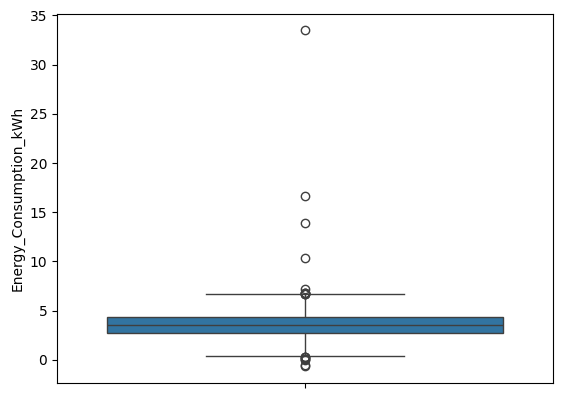

In [8]:
sns.boxplot(df['Energy_Consumption_kWh'])

Applying IQR for Energy_Consumption_kWh

In [9]:
# Finding the IQR
percentile25 = df['Energy_Consumption_kWh'].quantile(0.25)
percentile75 = df['Energy_Consumption_kWh'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 6.699999999999999
Lower limit 0.3000000000000007


In [10]:
# Finding the outliers
df[(df['Energy_Consumption_kWh'] > 6.69) | (df['Energy_Consumption_kWh'] < 0.3)]

,Date,Home_ID,City,Energy_Consumption_kWh,Occupancy,Temperature_C,Humidity_%,HVAC_Usage_kWh,Kitchen_Usage_kWh,Electronics_Usage_kWh
25,2024-01-23 04:00:00,Home_5,Pune,0.10,1,27.48,49.80,0.520,0.29,0.37
82,2024-01-03 05:00:00,Home_2,Chennai,33.48,1,32.68,84.52,1.170,0.15,0.64
108,2024-02-12 00:00:00,Home_10,Jaipur,0.28,1,23.20,45.63,0.380,1.17,0.63
182,2024-03-13 01:00:00,Home_6,Pune,13.93,1,33.00,89.82,0.632,0.22,0.14
382,2024-01-10 09:00:00,Home_10,Pune,6.73,1,18.72,44.13,0.830,-0.14,0.51
561,2024-02-22 12:00:00,Home_1,Kolkata,-0.49,1,29.10,53.31,1.400,1.12,0.85
679,2024-02-23 01:00:00,Home_3,Lucknow,6.72,1,27.54,51.90,1.030,0.81,0.61
829,2024-01-30 09:00:00,Home_2,Kolkata,-0.67,1,32.31,49.32,1.170,0.87,0.58
1276,2024-04-09 17:00:00,Home_7,Kolkata,16.63,1,18.91,53.33,0.640,0.85,0.49
1572,2024-03-30 16:00:00,Home_4,Lucknow,0.23,1,30.32,67.58,1.020,0.84,0.57


Outlier Removal using Capping

In [11]:
#Energy_Consumption
df['Energy_Consumption_kWh'] = np.where(
    df['Energy_Consumption_kWh']>6.69,
    6.69,
    np.where(
        df['Energy_Consumption_kWh']<0.3,
        0.3,
        df['Energy_Consumption_kWh']
    )
)
#Temperature
df['Temperature_C'] = np.where(
    df['Temperature_C']>39.5,
    39.5,
    np.where(
        df['Temperature_C']<8.3,
        8.3,
        df['Temperature_C']
    )
)

In [12]:
df.describe()

,Energy_Consumption_kWh,Occupancy,Temperature_C,Humidity_%,HVAC_Usage_kWh,Kitchen_Usage_kWh,Electronics_Usage_kWh
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,3.501111,0.696000,23.922286,59.880954,1.008475,0.799344,0.510372
std,1.171399,0.460075,5.159799,14.677255,0.504433,0.405211,0.297242
min,0.300000,0.000000,8.300000,8.190000,-1.030000,-0.650000,-0.560000
25%,2.700000,0.000000,20.470000,49.942500,0.680000,0.520000,0.310000
50%,3.510000,1.000000,23.890000,59.640000,1.015000,0.810000,0.510000
75%,4.300000,1.000000,27.402500,69.620000,1.360000,1.080000,0.710000
max,6.690000,1.000000,39.500000,113.160000,2.550000,2.310000,1.570000


<ipython-input-13-75edcfd036f8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Energy_Consumption_kWh'])
<ipython-input-13-75edcfd036f8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temperature_C'])


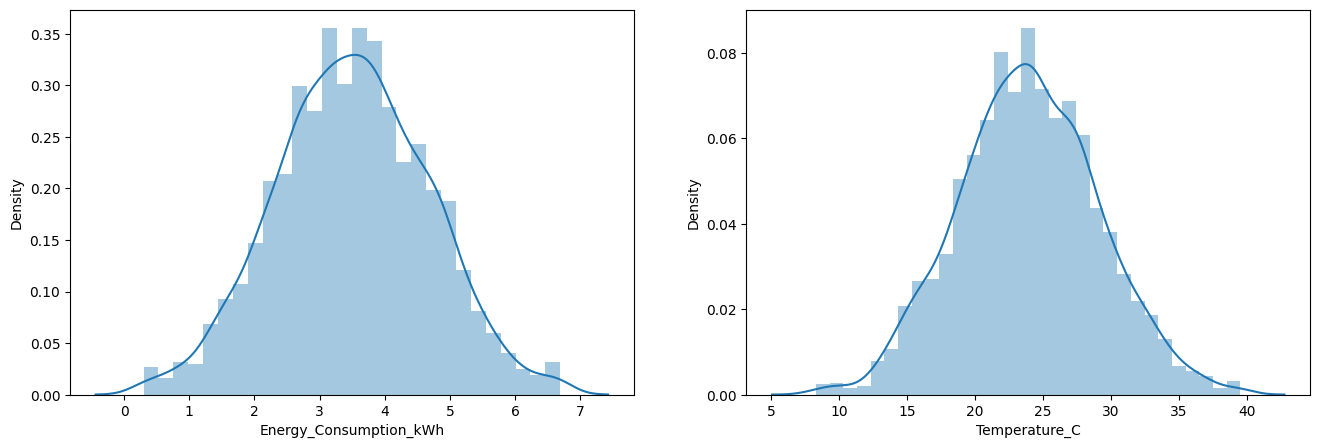

In [13]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Energy_Consumption_kWh'])

plt.subplot(1,2,2)
sns.distplot(df['Temperature_C'])

plt.show()

# **4. Time-Series Consistency**

In [14]:
df.Date.duplicated().sum()

0

No Duplicate Entries found in Timestamps

# **5. Data Normalization**

Applying MinMax Scaling to Energy Consumption, Temperature, Humidity and Appliance Usages

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['Energy_Consumption_kWh','HVAC_Usage_kWh', 'Kitchen_Usage_kWh', 'Electronics_Usage_kWh', 'Temperature_C', 'Humidity_%']] = scaler.fit_transform(df[['Energy_Consumption_kWh','HVAC_Usage_kWh', 'Kitchen_Usage_kWh', 'Electronics_Usage_kWh', 'Temperature_C', 'Humidity_%']])

In [ ]:
df

,Date,Home_ID,City,Energy_Consumption_kWh,Occupancy,Temperature_C,Humidity_%,HVAC_Usage_kWh,Kitchen_Usage_kWh,Electronics_Usage_kWh
0,2024-03-14 06:00:00,Home_8,Lucknow,0.206349,1,0.0,0.361151,0.600559,0.547297,0.441315
1,2024-04-06 06:00:00,Home_9,Hyderabad,0.555108,1,0.0,0.354673,0.438547,0.709459,0.403756
2,2024-01-30 13:00:00,Home_4,Lucknow,0.011849,0,0.0,0.469753,0.226257,0.290541,0.384977
3,2024-03-05 12:00:00,Home_5,Ahmedabad,0.000000,0,0.0,0.478899,0.888268,0.496622,0.521127
4,2024-01-19 00:00:00,Home_10,Kolkata,0.047619,0,0.0,0.727160,0.748603,0.310811,0.704225
...,...,...,...,...,...,...,...,...,...,...
2495,2024-02-17 14:00:00,Home_5,Kolkata,0.725017,1,0.0,0.516910,0.634078,0.793919,0.492958
2496,2024-03-09 04:00:00,Home_6,Chennai,0.000000,1,0.0,0.311708,0.555866,0.645270,0.361502
2497,2024-03-17 17:00:00,Home_2,Lucknow,0.333780,1,0.0,0.484234,0.692737,0.422297,0.732394
2498,2024-02-06 12:00:00,Home_6,Lucknow,0.371786,0,0.0,0.495761,0.527933,0.422297,0.469484


**__End of Week-1__**

**START OF WEEK-2**

**EXPLORATORY DATA ANALYSIS**

**1.Convert Data Types**

In [16]:
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Verify the conversion
print(df.dtypes)


Date                      datetime64[ns]
Home_ID                           object
City                              object
Energy_Consumption_kWh           float64
Occupancy                          int64
Temperature_C                    float64
Humidity_%                       float64
HVAC_Usage_kWh                   float64
Kitchen_Usage_kWh                float64
Electronics_Usage_kWh            float64
dtype: object


**2.Univariate Analysis**

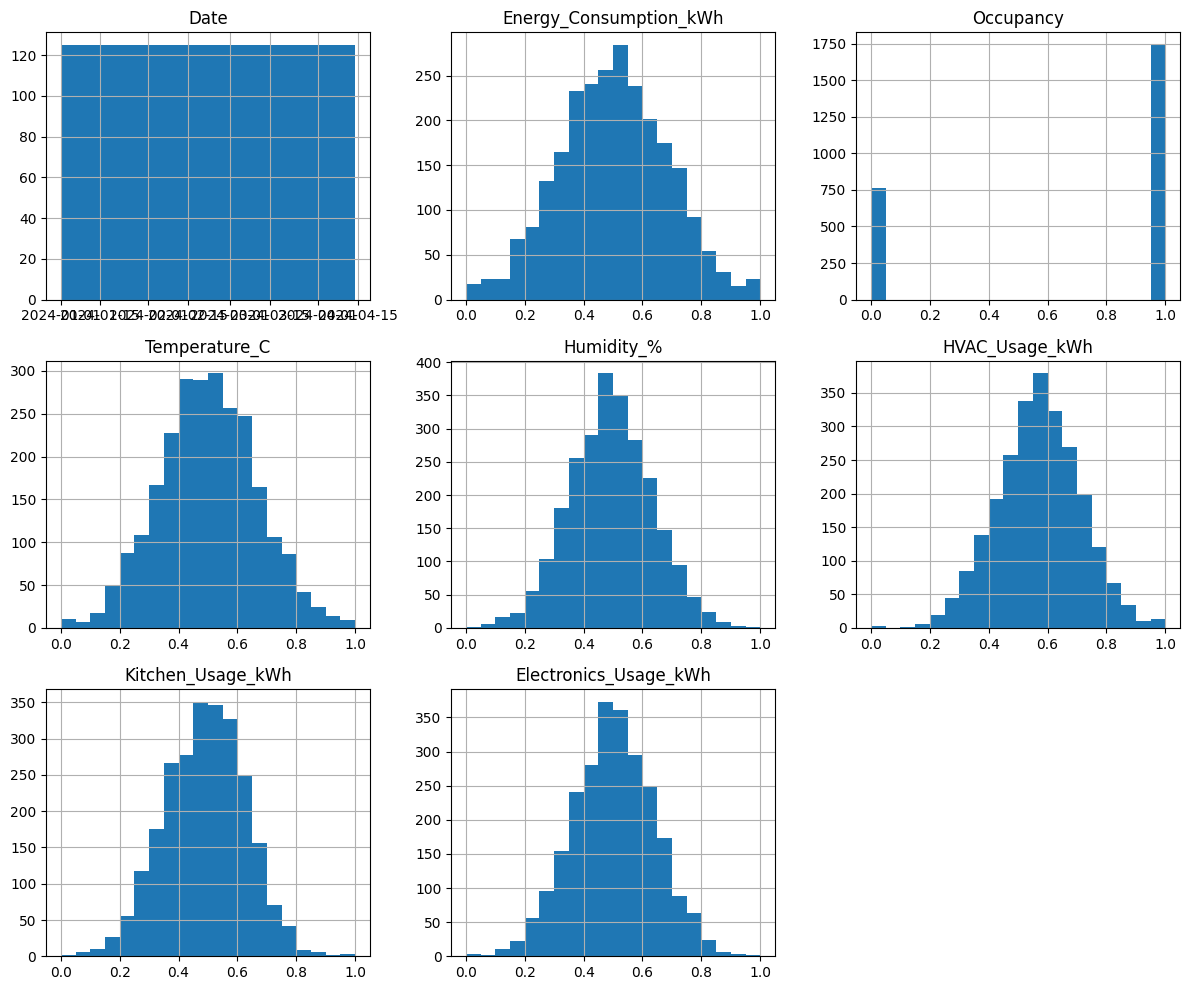

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


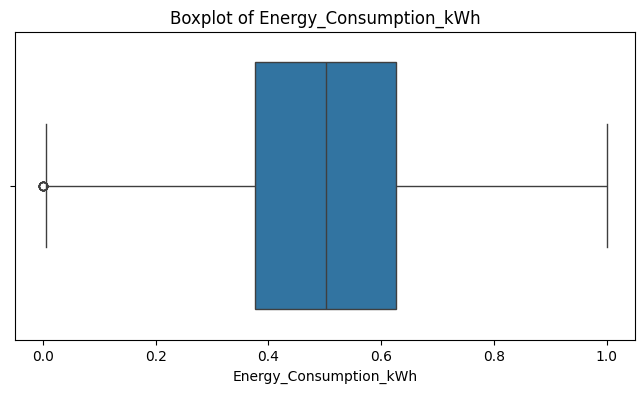

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


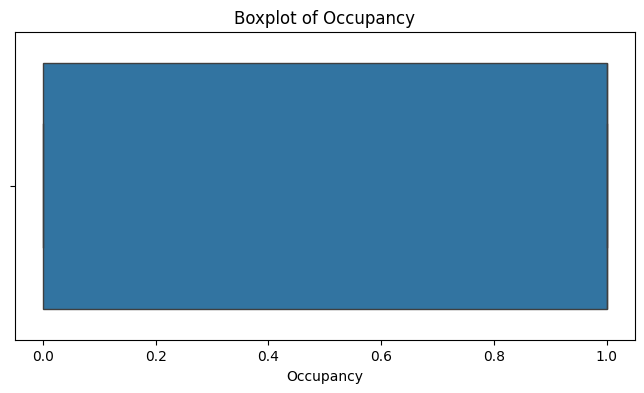

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


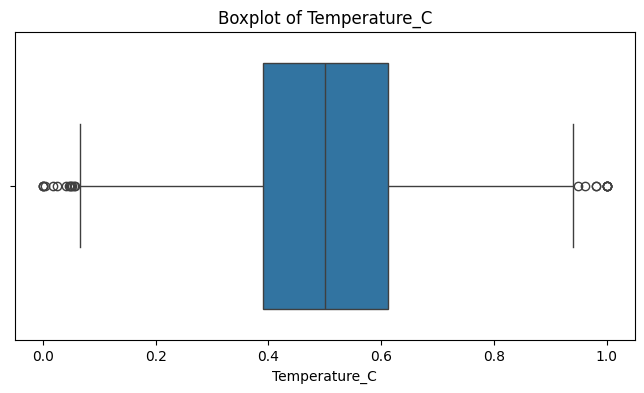

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


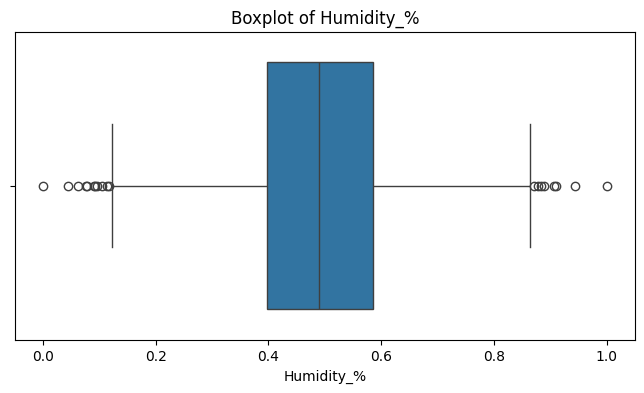

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


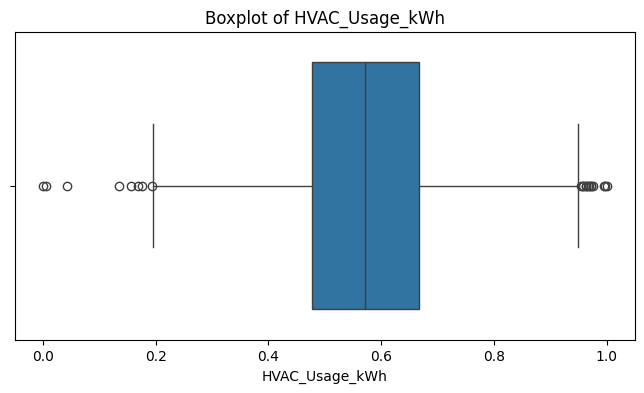

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


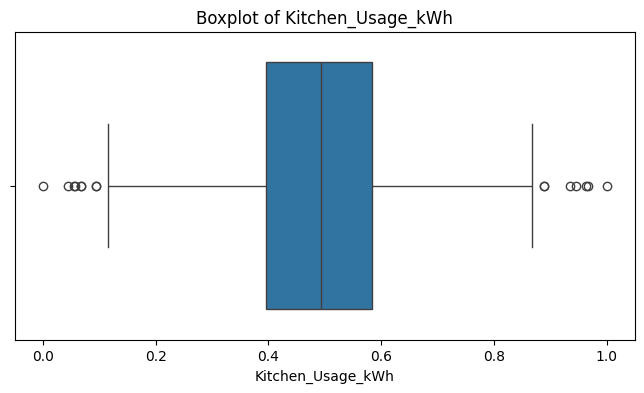

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


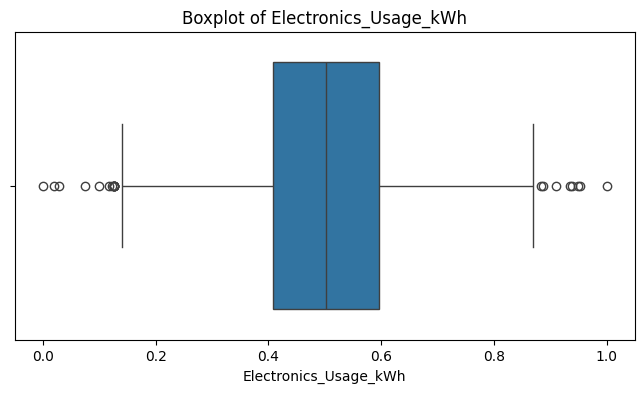

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

# Boxplots for outlier detection
for col in ['Energy_Consumption_kWh', 'Occupancy', 'Temperature_C', 'Humidity_%',
            'HVAC_Usage_kWh', 'Kitchen_Usage_kWh', 'Electronics_Usage_kWh']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


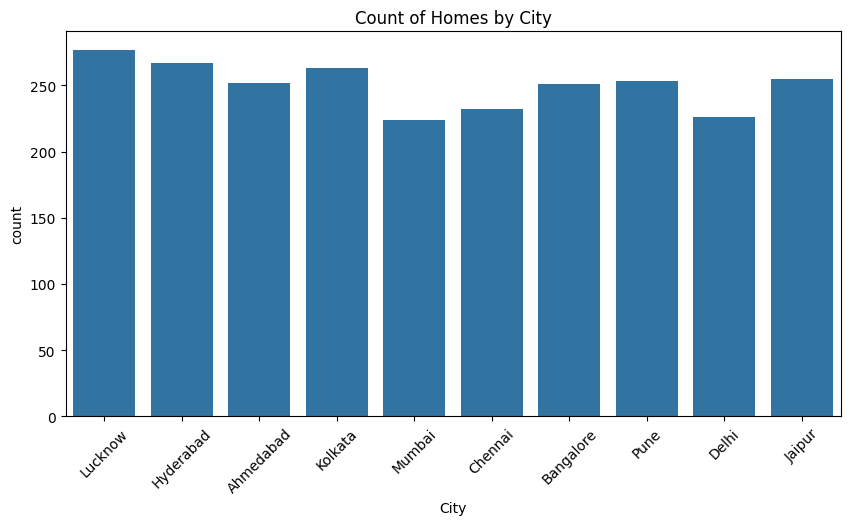

In [18]:
# Count plots for categorical variables
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='City')
plt.title('Count of Homes by City')
plt.xticks(rotation=45)
plt.show()


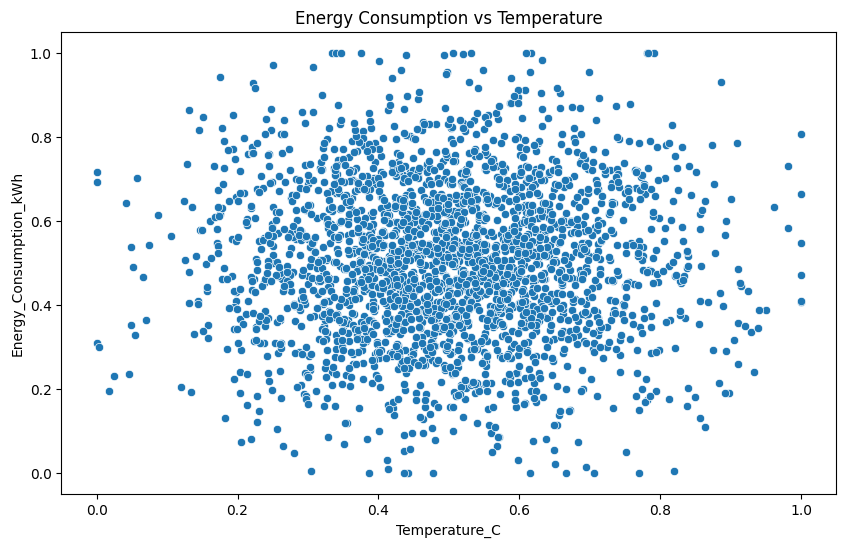

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature_C', y='Energy_Consumption_kWh')
plt.title('Energy Consumption vs Temperature')
plt.show()


**3.Time Series Analysis**

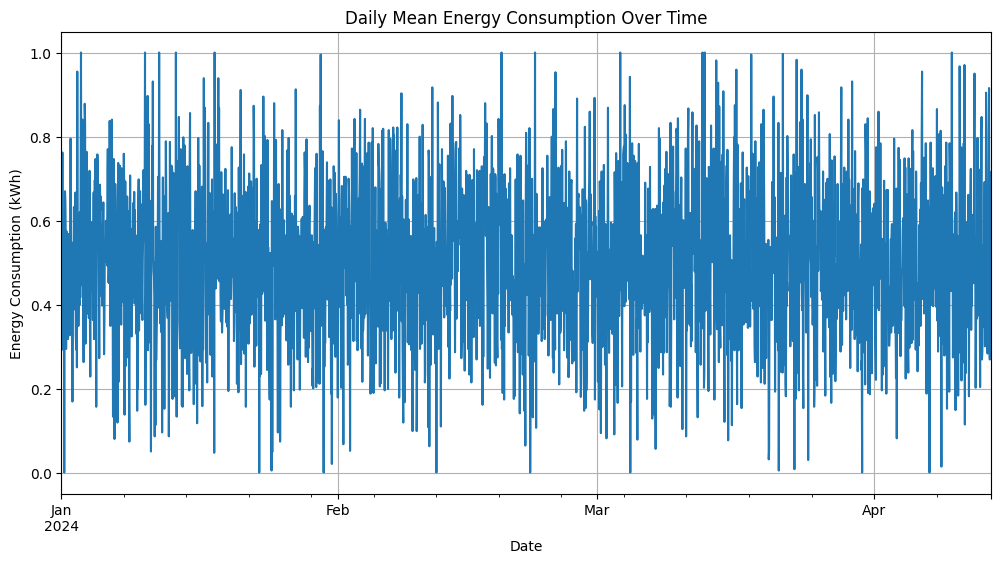

In [20]:
# Group by Date and calculate mean energy consumption
daily_energy = df.groupby('Date')['Energy_Consumption_kWh'].mean()

# Plotting
plt.figure(figsize=(12, 6))
daily_energy.plot()
plt.title('Daily Mean Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.grid()
plt.show()


**4.Occupany Impact Analysis**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


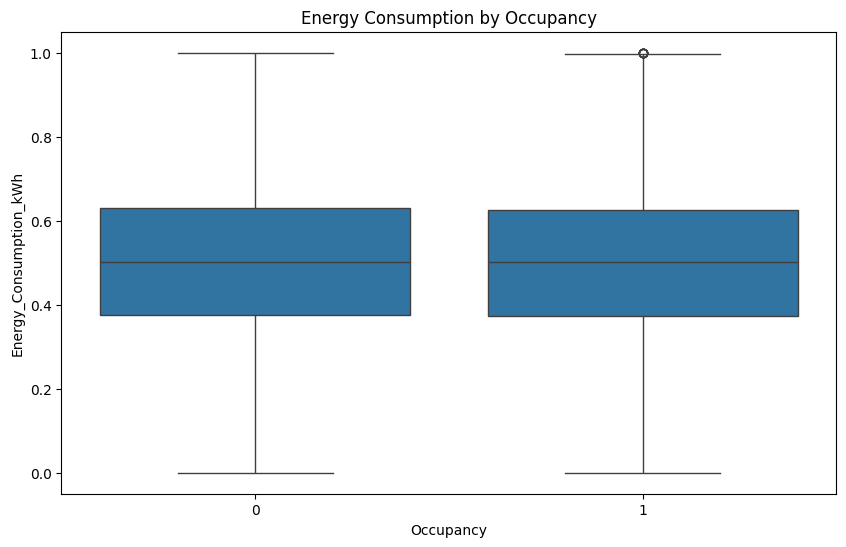

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Occupancy', y='Energy_Consumption_kWh')
plt.title('Energy Consumption by Occupancy')
plt.show()


KEY INSIGHTS

1.Impact of Occupancy: Higher occupancy levels lead to increased energy consumption, highlighting the importance of understanding home occupancy in energy management.

2.Temperature Influence: Temperature significantly affects HVAC energy usage, suggesting that efficient temperature management could lead to lower energy costs.

3.Usage Patterns: Kitchen and electronics usage are substantial contributors to total energy consumption, indicating areas for potential energy savings.

4.Data Trends: Seasonal variations affect energy consumption patterns, emphasizing the need for time-based strategies in energy management.

**END OF WEEK 2**

# **START OF WEEK 3**

In [22]:
df.head()

,Date,Home_ID,City,Energy_Consumption_kWh,Occupancy,Temperature_C,Humidity_%,HVAC_Usage_kWh,Kitchen_Usage_kWh,Electronics_Usage_kWh
0,2024-03-14 06:00:00,Home_8,Lucknow,0.444444,1,0.558013,0.361151,0.600559,0.547297,0.441315
1,2024-04-06 06:00:00,Home_9,Hyderabad,0.688576,1,0.622756,0.354673,0.438547,0.709459,0.403756
2,2024-01-30 13:00:00,Home_4,Lucknow,0.308294,0,0.253205,0.469753,0.226257,0.290541,0.384977
3,2024-03-05 12:00:00,Home_5,Ahmedabad,0.078247,0,0.480769,0.478899,0.888268,0.496622,0.521127
4,2024-01-19 00:00:00,Home_10,Kolkata,0.333333,0,0.412821,0.727160,0.748603,0.310811,0.704225


1. Data Splitting
2. Model Selection and Training
3. Model Evaluation

In [31]:
# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the dataset by Date to maintain the time-series nature
df = df.sort_values(by='Date')

# Define an 80/20 train-test split
split_ratio = 0.8
split_index = int(len(df) * split_ratio)

# Split the data into training and testing sets
train_data = df[:split_index]
test_data = df[split_index:]

# Verify the split
train_data.shape, test_data.shape

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Select the features and target variable for training
features = ['Occupancy', 'Temperature_C', 'Humidity_%', 'HVAC_Usage_kWh',
            'Kitchen_Usage_kWh', 'Electronics_Usage_kWh']
target = 'Energy_Consumption_kWh'

# Prepare the training and testing sets
X_train = train_data[features]
y_train = train_data[target]

X_test = test_data[features]
y_test = test_data[target]

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance using MAE and R-squared
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2

(0.14362644661164473, -0.006620356430983021)

4. Feature Importance and Interpretation

                 Feature  Coefficient
0              Occupancy    -0.010354
1          Temperature_C     0.009683
2             Humidity_%     0.018812
3         HVAC_Usage_kWh    -0.040134
4      Kitchen_Usage_kWh     0.028231
5  Electronics_Usage_kWh     0.019194


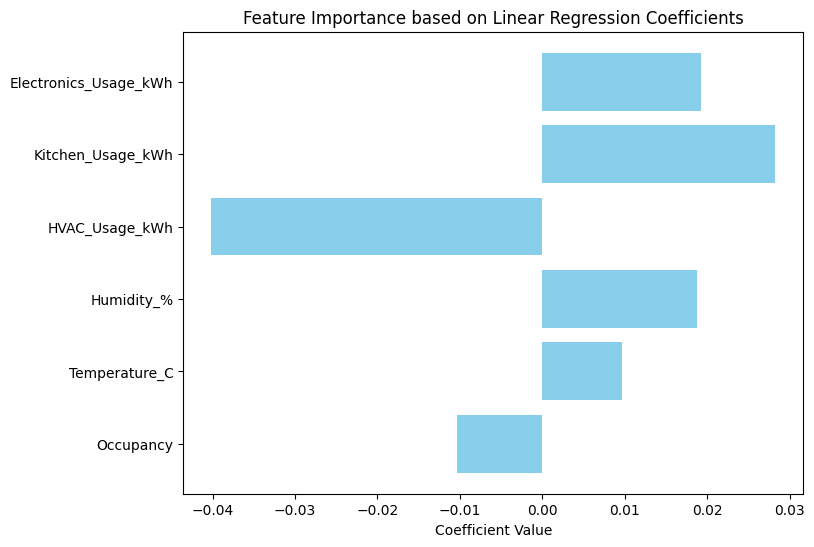

In [30]:
!pip install ace # Install the 'ace' module, which might be the intended package
# Re-train the linear regression model
model.fit(X_train, y_train)

# Retrieve the coefficients for each feature
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})

# Display the coefficients to the user
#import ace_tools as tools # Commented out the potentially incorrect import
#tools.display_dataframe_to_user(name="Feature Importance (Coefficients)", dataframe=coefficients) # Commented out line using the incorrect module

print(coefficients) # Print the coefficients DataFrame as a simple alternative

# Visualize the feature importance using a bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance based on Linear Regression Coefficients')
plt.show()

5. Predictive System and Testing

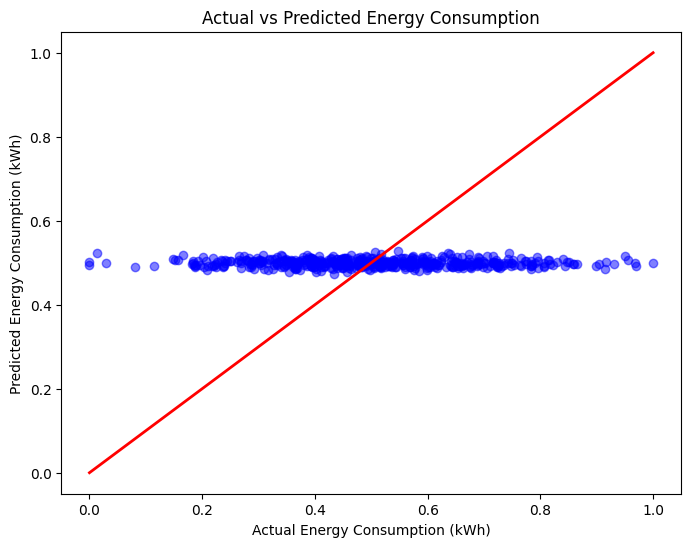

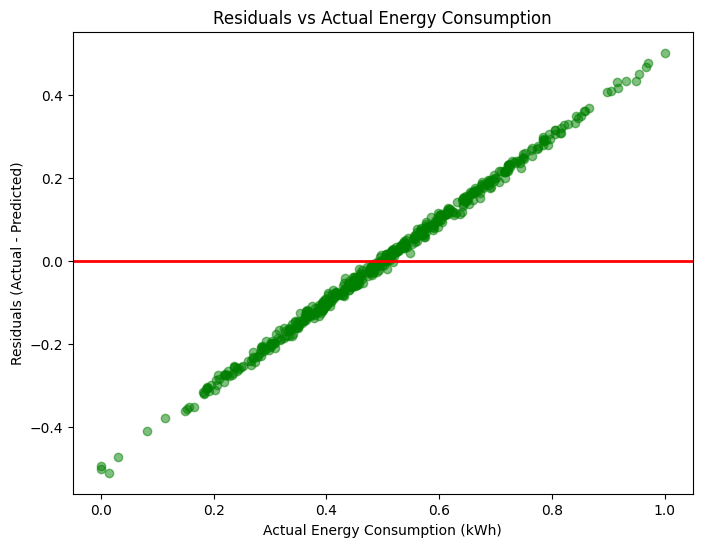

In [32]:
# Make predictions on the test set using the trained model
y_pred = model.predict(X_test)

# Scatter plot: Actual vs Predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Energy Consumption (kWh)')
plt.ylabel('Predicted Energy Consumption (kWh)')
plt.title('Actual vs Predicted Energy Consumption')
plt.show()

# Residual plot: Residuals (errors) vs Actual values
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, color='green', alpha=0.5)
plt.axhline(0, color='red', lw=2)
plt.xlabel('Actual Energy Consumption (kWh)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Actual Energy Consumption')
plt.show()
